In [353]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [354]:
df = pd.read_csv('agaricus-lepiota.csv', header=None)

In [355]:
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [356]:
# giving columns menaingful names

column_names = ['Edible', 'Cap_Shape', 'Cap_Surface', 'Cap-Color','Bruises', 'Odor', 'Gill_Attachment', 'Gill_Spacing','Gill_Size', 'Gill_Color', 'Stalk_Shape', 'Stalk_Root', 'Stalk_Surface_Above_Ring', 'Stalk_Surface_Below_Ring', 'Stalk_Color_Above_Ring', 'Stock_Color_Below_Ring', 'Veil_Type', 'Veil_Color', 'Ring_Number', 'Ring_Type', 'Spor_Print_Color', 'Population', 'Habitat']
df.columns = column_names

In [357]:
df.duplicated().sum()

0

In [358]:
df.isnull().sum()

# the orginal data from UCI machine learning states thats ome missing values are entered as a '?' and not an nan value
# and these '?' are found for the 'Stalk_Root' feature

Edible                      0
Cap_Shape                   0
Cap_Surface                 0
Cap-Color                   0
Bruises                     0
Odor                        0
Gill_Attachment             0
Gill_Spacing                0
Gill_Size                   0
Gill_Color                  0
Stalk_Shape                 0
Stalk_Root                  0
Stalk_Surface_Above_Ring    0
Stalk_Surface_Below_Ring    0
Stalk_Color_Above_Ring      0
Stock_Color_Below_Ring      0
Veil_Type                   0
Veil_Color                  0
Ring_Number                 0
Ring_Type                   0
Spor_Print_Color            0
Population                  0
Habitat                     0
dtype: int64

In [411]:
# Checking for the values with a '?'

missing_values = df.iloc[:,11][df.iloc[:,11]=='?']
print(len(missing_values))
print(len(missing_values)/len(df))

2480
0.3052683407188577


In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Edible                    8124 non-null   object
 1   Cap_Shape                 8124 non-null   object
 2   Cap_Surface               8124 non-null   object
 3   Cap-Color                 8124 non-null   object
 4   Bruises                   8124 non-null   object
 5   Odor                      8124 non-null   object
 6   Gill_Attachment           8124 non-null   object
 7   Gill_Spacing              8124 non-null   object
 8   Gill_Size                 8124 non-null   object
 9   Gill_Color                8124 non-null   object
 10  Stalk_Shape               8124 non-null   object
 11  Stalk_Root                8124 non-null   object
 12  Stalk_Surface_Above_Ring  8124 non-null   object
 13  Stalk_Surface_Below_Ring  8124 non-null   object
 14  Stalk_Color_Above_Ring  

In [413]:
df.describe()

,Edible,Cap_Shape,Cap_Surface,Cap-Color,Bruises,Odor,Gill_Attachment,Gill_Spacing,Gill_Size,Gill_Color,...,Stalk_Surface_Below_Ring,Stalk_Color_Above_Ring,Stock_Color_Below_Ring,Veil_Type,Veil_Color,Ring_Number,Ring_Type,Spor_Print_Color,Population,Habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,convex,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [414]:
# a function for all values/entries to have their right names instead of just a letter

def my_function(x):
    if x == 'b':
        return 'bell'
    elif x == 'c':
        return 'conical'
    elif x == 'x':
        return 'convex'
    elif x == 'f':
        return 'flat'
    elif x == 'k':
        return 'knobbed'
    else:
        return 'sunken'

df['Cap_Shape'] = df['Cap_Shape'].apply(my_function)

In [415]:
df.head()

,Edible,Cap_Shape,Cap_Surface,Cap-Color,Bruises,Odor,Gill_Attachment,Gill_Spacing,Gill_Size,Gill_Color,...,Stalk_Surface_Below_Ring,Stalk_Color_Above_Ring,Stock_Color_Below_Ring,Veil_Type,Veil_Color,Ring_Number,Ring_Type,Spor_Print_Color,Population,Habitat
0,p,sunken,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,sunken,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,sunken,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,sunken,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,sunken,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [418]:
# checking for the distribution of the targe class

df['Edible'].value_counts()

e    4208
p    3916
Name: Edible, dtype: int64

In [419]:
X = df.iloc[:,1:]

In [420]:
X

,Cap_Shape,Cap_Surface,Cap-Color,Bruises,Odor,Gill_Attachment,Gill_Spacing,Gill_Size,Gill_Color,Stalk_Shape,...,Stalk_Surface_Below_Ring,Stalk_Color_Above_Ring,Stock_Color_Below_Ring,Veil_Type,Veil_Color,Ring_Number,Ring_Type,Spor_Print_Color,Population,Habitat
0,sunken,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,sunken,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,sunken,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,sunken,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,sunken,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,sunken,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,sunken,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,sunken,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,sunken,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [421]:
X = pd.get_dummies(X, drop_first=True)

In [422]:
X

,Cap_Surface_g,Cap_Surface_s,Cap_Surface_y,Cap-Color_c,Cap-Color_e,Cap-Color_g,Cap-Color_n,Cap-Color_p,Cap-Color_r,Cap-Color_u,...,Population_n,Population_s,Population_v,Population_y,Habitat_g,Habitat_l,Habitat_m,Habitat_p,Habitat_u,Habitat_w
0,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [423]:
selected_features = X.columns
type(selected_features)

pandas.core.indexes.base.Index

In [424]:
X

,Cap_Surface_g,Cap_Surface_s,Cap_Surface_y,Cap-Color_c,Cap-Color_e,Cap-Color_g,Cap-Color_n,Cap-Color_p,Cap-Color_r,Cap-Color_u,...,Population_n,Population_s,Population_v,Population_y,Habitat_g,Habitat_l,Habitat_m,Habitat_p,Habitat_u,Habitat_w
0,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [425]:
y = df.iloc[:,0]

In [426]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: Edible, Length: 8124, dtype: object

In [432]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [433]:
lr = LogisticRegression()

In [434]:
lr.fit(X_train, y_train)

LogisticRegression()

In [435]:
y_pred = lr.predict(X_test)

In [436]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



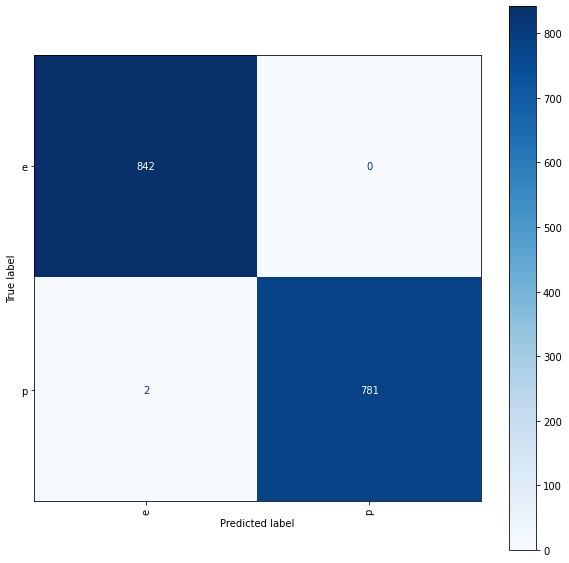

In [438]:
fig, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(lr, X_test, y_test,
                             display_labels=lr.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

In [439]:
print(accuracy_score(y_test, y_pred))

0.9987692307692307


In [440]:
enc = OrdinalEncoder()
X = enc.fit_transform(X)

In [441]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [442]:
model_C = CategoricalNB()
clf = model_C.fit(X_train, y_train)

In [443]:
pred_labels = model_C.predict_proba(X_test)

In [444]:
score = model_C.score(X_test,y_test)

In [445]:
print("Model Accuracy: %f" % score)

Model Accuracy: 0.953231


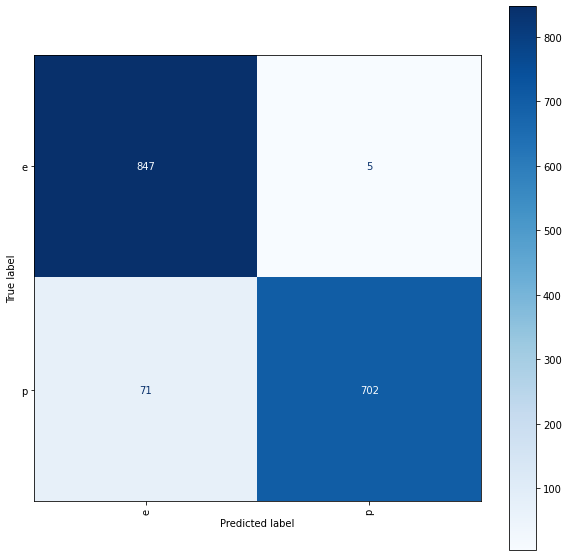

In [454]:
fig, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(model_C, X_test, y_test,
                             display_labels=model_C.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

In [455]:
rf_model = RandomForestClassifier()


# Fit our model with our training data.
rf_model.fit(X_train, y_train)


# Make new predictions of our testing data. 
y_pred = rf_model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = rf_model.predict_proba(X_test)

# Evaluate our model
accuracy =  rf_model.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)

print(classification_report(y_test, y_pred, target_names=rf_model.classes_))

Model Accuracy: 1.000000
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       852
           p       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [458]:
# getting the top most feature importance 

my_dict = {'feature_importance': rf_model.feature_importances_,
           'feature':selected_features }
feature_imp = pd.DataFrame.from_dict( my_dict ).sort_values('feature_importance', ascending=False)
feature_imp.head(15)

,feature_importance,feature
17,0.159906,Odor_n
23,0.096811,Gill_Size_n
14,0.080008,Odor_f
40,0.065027,Stalk_Surface_Above_Ring_k
43,0.053202,Stalk_Surface_Below_Ring_k
71,0.039184,Spor_Print_Color_h
70,0.034646,Ring_Type_p
82,0.033574,Population_v
12,0.032658,Bruises_t
77,0.024239,Spor_Print_Color_w


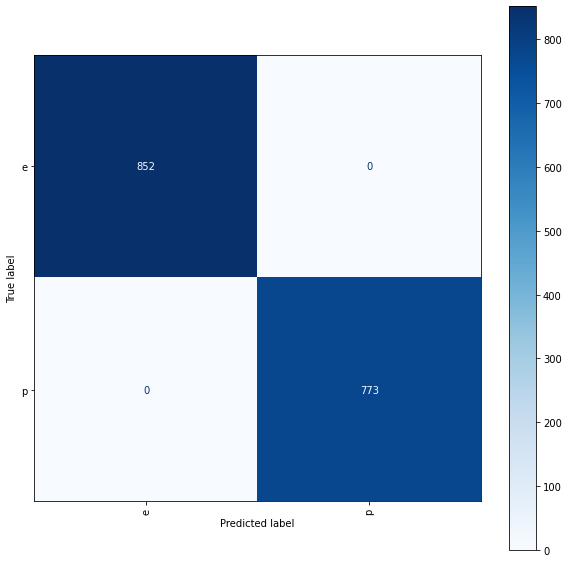

In [459]:
fig, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(rf_model, X_test, y_test,
                             display_labels=rf_model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp